# PumpItUp: Data Mining From a Water Table

Student name: Amanda Rowe
Student pace: self paced
Instructor name: Jeff Herman
Blog post URL: https://roweyerboat.github.io/reality_behind_the_data

The task of this project was to help the Tanzanian government as well as supporting organizations to detect when a water well will be in need of repair.  Tanzania experiences severe dry seasons and most of the population lives in rural communities.  Therefore the issue of non-functioning wells is very important to the well being of the people of Tanzania.  

After running many multiples using the ternary classification of functional, functional needs repair, and not functional, I engineered the target labels to be binary: functional and needs repair since there weren't as many wells in the training data labeled functional but needs repair.  

I tried many different classification models and found that Random Forest was the best performer.  I utilized GridSearchCV to identify the best parameters.  I was able to achieve an accuracy of .81 with my tuned Random Forest model.  

## Load libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
np.random.seed(0)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import scikitplot as skplt

### Import Preprocessed Data

In [6]:
df = pd.read_csv('binary_for_models.csv')
df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [7]:
# Split target and features
target = df['status_group']
features = df.drop('status_group', axis=1)

### Build the model

In [8]:
# Features used
features.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'payment_type', 'water_quality', 'quantity',
       'source', 'waterpoint_type'],
      dtype='object')

In [9]:
# One Hot Encoding
features = pd.get_dummies(features)
features.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [12]:
# Initialize Random Forest using the best parameters from the GridSearchCV
forest_clf = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
mean_forest_cv_score = np.mean(cross_val_score(forest_clf, X_train, y_train, cv=3))
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_forest_cv_score: .2%}")
forest_clf.fit(X_train, y_train)

Mean Cross Validation Score for Random Forest Classifier:  80.90%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
forest_clf.score(X_train, y_train)

0.8699438832772166

In [14]:
forest_clf.score(X_test, y_test)

0.812053872053872

In [15]:
forest_clf_preds = forest_clf.predict(X_test)
print(classification_report(y_test, forest_clf_preds))

              precision    recall  f1-score   support

  functional       0.79      0.89      0.84      8098
needs repair       0.84      0.72      0.78      6752

    accuracy                           0.81     14850
   macro avg       0.82      0.80      0.81     14850
weighted avg       0.82      0.81      0.81     14850



### Plot the Confusion Matrix

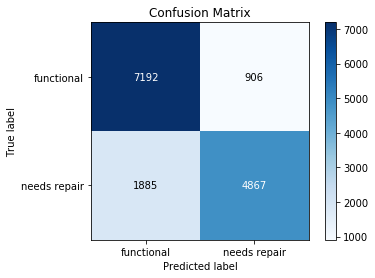

In [20]:
# Confusion Matrix Heatmap
skplt.metrics.plot_confusion_matrix(y_test, forest_clf_preds, normalize=False, cmap = 'Blues')

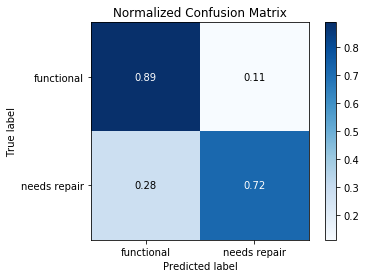

In [19]:
# Normalized Confusion Matrix Heatmap
skplt.metrics.plot_confusion_matrix(y_test, forest_clf_preds, normalize=True, cmap = 'Blues')